<h1 style="text-align: center;" class="list-group-item list-group-item-action active">Import Libraries & Data</h1>

# Import Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Read Data & Overview

In [2]:
df = pd.read_csv('../input/ecommerce-customers/Ecommerce Customers.csv')
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [4]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


<h1 style="text-align: center;" class="list-group-item list-group-item-action active">Exploratory Data Analysis</h1>

# Exploratory Data Analysis

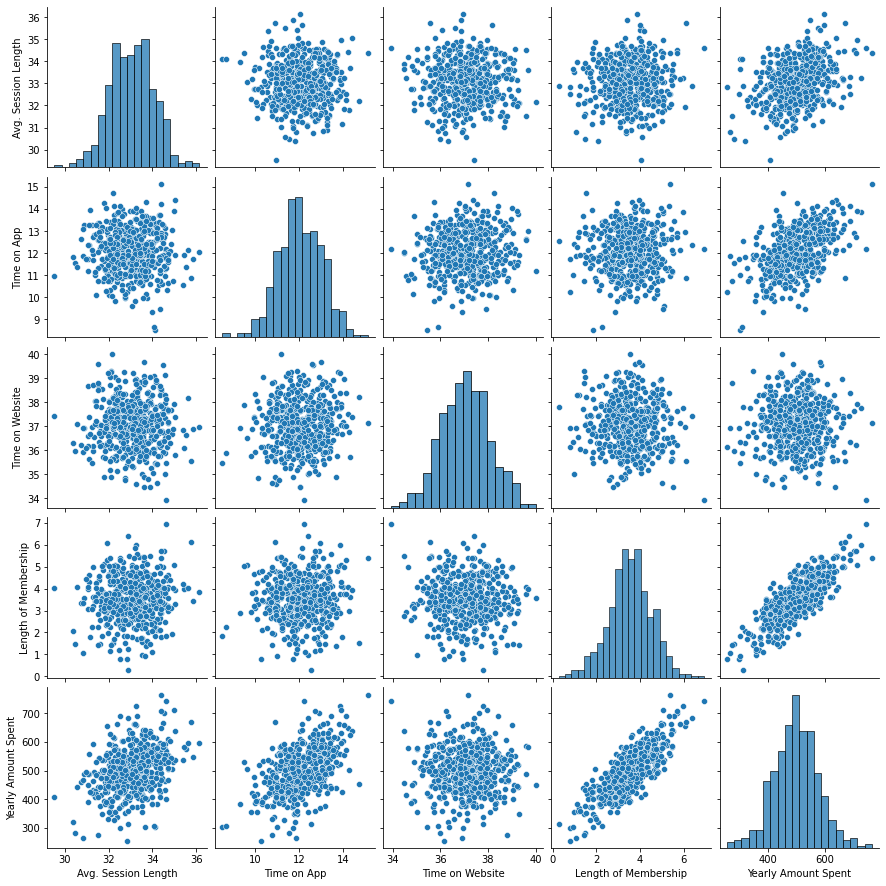

In [5]:
sns.pairplot(df)

<AxesSubplot:>

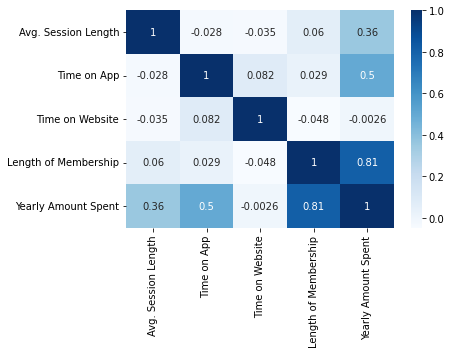

In [6]:
sns.heatmap(df.corr(), annot=True, cmap='Blues')

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Yearly Amount Spent', ylabel='Density'>

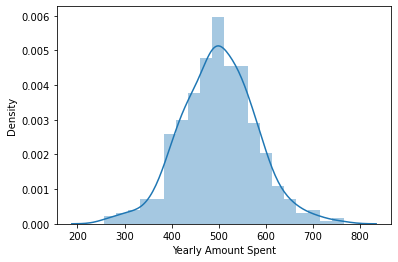

In [7]:
sns.distplot(df['Yearly Amount Spent'])

In [8]:
df

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510


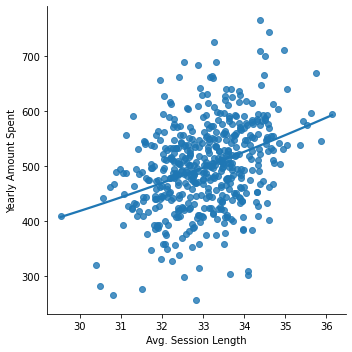

In [9]:
sns.lmplot(x ='Avg. Session Length', y ='Yearly Amount Spent', data = df, order = 2, ci = None)

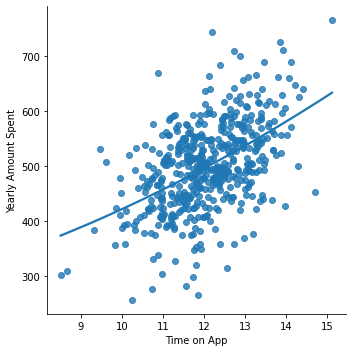

In [10]:
sns.lmplot(x ='Time on App', y ='Yearly Amount Spent', data = df, order = 2, ci = None)

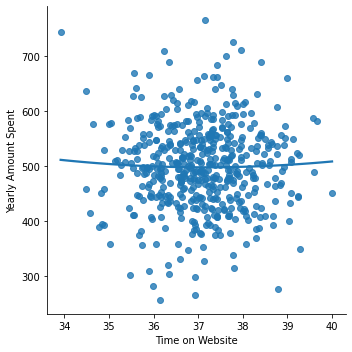

In [11]:
sns.lmplot(x ='Time on Website', y ='Yearly Amount Spent', data = df, order = 2, ci = None)

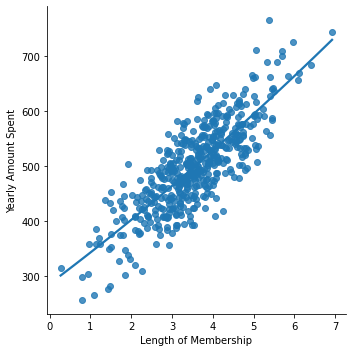

In [12]:
sns.lmplot(x ='Length of Membership', y ='Yearly Amount Spent', data = df, order = 2, ci = None)

## Detect and remove outlires


<AxesSubplot:>

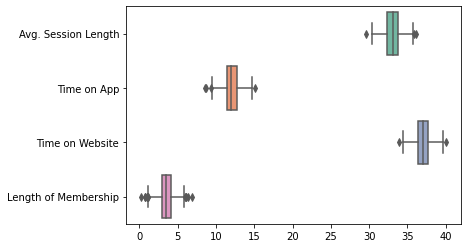

In [13]:
sns.boxplot(data=df[['Avg. Session Length','Time on App','Time on Website','Length of Membership']], orient="h", palette="Set2")

<AxesSubplot:>

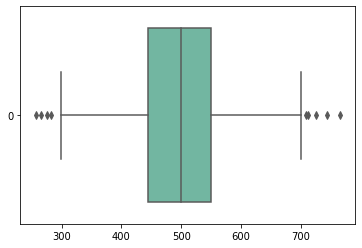

In [14]:
sns.boxplot(data=df['Yearly Amount Spent'], orient="h", palette="Set2")

In [15]:
upper_outlires_list = []
lower_outlires_list = []

for col in df.columns:
    if np.issubdtype(df[col].dtype, np.number): 
        # outliers are values greater than (Q3+1.5*IQR)
        Q1 = np.percentile(df[col], 25, interpolation = 'midpoint')
        Q3 = np.percentile(df[col], 75, interpolation = 'midpoint')
        IQR = Q3 - Q1
        # Upper bound
        upper = np.where(df[col] >= (Q3+1.5*IQR))
        # lower bound
        lower = np.where(df[col] <= (Q1-1.5*IQR))
        upper_outlires_list.append(upper[0])
        lower_outlires_list.append(lower[0])

In [16]:

# Remove outlires
for i in range(len(upper_outlires_list)):
    df.drop(upper_outlires_list[i], errors='ignore', inplace = True)
    df.drop(lower_outlires_list[i], errors='ignore', inplace = True)

<AxesSubplot:>

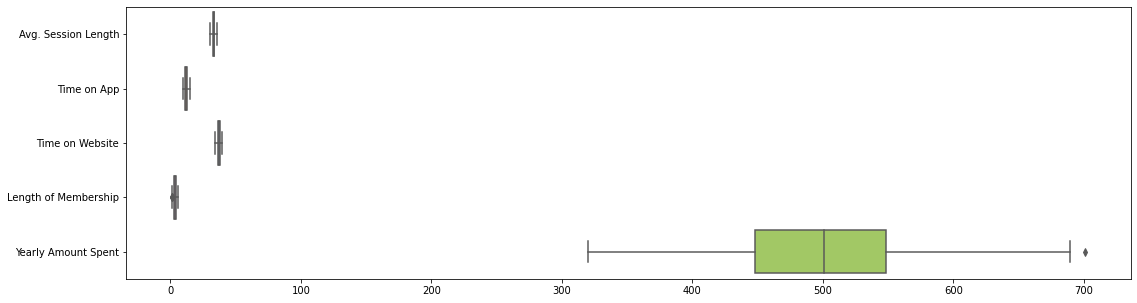

In [17]:
# confirm changes
plt.figure(figsize=(18,5))
sns.boxplot(data=df, orient="h", palette="Set2")

<h1 style="text-align: center;" class="list-group-item list-group-item-action active">Build ML Model</h1>

# Build ML Model

## define response and explanatory variable

In [18]:
# response variable
y = df['Yearly Amount Spent']
# explanatory variables
x = df[['Avg. Session Length','Time on App','Time on Website','Length of Membership']]

## split data to train and test

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

## buuild linear model and fit data


In [20]:
lmodel = LinearRegression()
lmodel.fit(x_train,y_train)

LinearRegression()

## model prediction


In [21]:
y_pred = lmodel.predict(x_test)
y_pred

array([513.60356375, 512.99405927, 483.20476481, 450.39016583,
       619.54447107, 576.59237507, 611.11866964, 416.59927302,
       633.76120492, 440.96164537, 477.19541032, 484.10632567,
       456.40937418, 579.91197425, 486.24820403, 397.48395117,
       459.882675  , 513.3229625 , 508.33407735, 609.18823378,
       384.24697727, 520.19480014, 481.24192995, 569.65623765,
       594.29989261, 401.80497567, 513.61020976, 623.38305541,
       543.28264608, 414.04395438, 619.36670774, 512.21267489,
       548.03328346, 518.03539772, 460.49488328, 544.36620435,
       596.16660332, 447.79501484, 494.06396703, 475.0367838 ,
       531.02507276, 449.18323743, 500.65735003, 513.29501848,
       337.79241226, 628.30112385, 467.89003359, 508.81006392,
       529.06173176, 567.71978734, 411.49395122, 494.33788394,
       447.42560896, 387.12829681, 354.09973036, 458.60051637,
       534.66416183, 431.24502627, 502.21102767, 382.11405117,
       465.19161616, 473.33128719, 553.59079502, 512.55

In [22]:
y_test.values

array([510.50147847, 507.44183234, 482.35357032, 444.2859075 ,
       596.43017262, 593.07724134, 626.01867266, 424.67528101,
       640.7861664 , 427.1993849 , 478.60091594, 498.63559849,
       451.72786332, 576.47760717, 487.37930602, 392.28524425,
       447.68790654, 497.51368333, 486.94705384, 612.3852299 ,
       385.15233799, 514.00981785, 493.71919298, 557.60826205,
       587.95105397, 401.03313522, 522.33740461, 614.71533383,
       541.04983096, 413.29599918, 616.66028602, 505.11963753,
       561.51653198, 519.3729768 , 453.16950235, 538.77493348,
       605.0610388 , 438.30370785, 490.20659998, 475.75906779,
       532.75178758, 445.74984124, 485.92313052, 510.66179222,
       338.31986264, 630.15672817, 444.05382657, 514.08895775,
       533.39655379, 574.74721966, 404.82452887, 489.812488  ,
       443.44186006, 392.49739919, 357.86371864, 452.12262509,
       544.77986372, 436.72055586, 510.40138845, 376.33690076,
       472.99224667, 462.89763615, 553.60153468, 503.21

## model evaluation


In [23]:
mean_absolute_error(y_test,y_pred)

8.092980230978478

## coeffecient & linear equation


In [24]:
lmodel.intercept_

-1049.1074262380175

In [25]:
lmodel.feature_names_in_

array(['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership'], dtype=object)

In [26]:
lmodel.coef_

array([25.9554992 , 39.01591634,  0.12285171, 61.08319278])

In [27]:
# y = -1049.1074262380175
#     + 25.9554992(Avg. Session Length) 
#     + 39.01591634(Time on App) 
#     + 0.12285171(Time on Website) 
#     + 61.08319278(Length of Membership)